In [37]:
### Normalize timestamps: read in a csv, normalize county timestamps by inserting
# write normalized CSV


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# Load the CSV file into a Pandas DataFrame


#df = pd.read_csv('smol.csv')
df = pd.read_csv('POUS.csv')

# Convert Unix epoch column to datetime objects

#Convert datetime to Unix epoch
df['datetime']=pd.to_datetime(df['RecordDateTime'], format='%Y-%m-%d %H:%M:%S')
#df['epoch'] = (df['datetime'] - dt.datetime(1970,1,1)).dt.total_seconds()

column_names = list(df.columns)
print(column_names)

# make and save smol.csv for testing

smol = df[df['CountyName'] == 'Alameda']
smol = pd.concat([smol, df[df['CountyName'] == 'Alpine']],ignore_index=True)


['UtilityName', 'StateName', 'CountyName', 'CountyFIPS', 'CustomersTracked', 'CustomersOut', 'RecordDateTime', 'datetime']


In [18]:
smol

,UtilityName,StateName,CountyName,CountyFIPS,CustomersTracked,CustomersOut,RecordDateTime,datetime
0,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,0,2021-09-29 18:31:29,2021-09-29 18:31:29
1,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,180,2021-09-29 20:02:33,2021-09-29 20:02:33
2,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,159,2021-09-29 20:23:11,2021-09-29 20:23:11
3,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,158,2021-09-29 20:42:07,2021-09-29 20:42:07
4,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,103,2021-09-29 21:01:14,2021-09-29 21:01:14
...,...,...,...,...,...,...,...,...
25913,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,0,2023-03-18 00:09:18,2023-03-18 00:09:18
25914,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,1,2023-03-18 21:47:36,2023-03-18 21:47:36
25915,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,0,2023-03-19 00:59:41,2023-03-19 00:59:41
25916,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,47,2023-03-20 18:06:11,2023-03-20 18:06:11


In [25]:
# # step through all data rows to find min and max times


min_time = df['datetime'].nsmallest(1)
max_time = df['datetime'].nlargest(1)
print(min_time)
print(min_time[0])

0   2021-09-29 18:31:29
Name: datetime, dtype: datetime64[ns]
2021-09-29 18:31:29


In [38]:
# sausage grinder -- make temporary dataset of just counties + timestamps when outages above a threshold
# for every county, add min and max times            

# also find duplicated timestamps and add a second.
# this is really slow! Could speed up using duplicated() but onlty need to run once....

last_county = "Null"
last_dt = dt.datetime(1970,1,1)
last_outages = 0
state = "none"

df2 = pd.DataFrame(columns=df.columns)


#for i, r in smol.iterrows():
for i, r in df.iterrows():
    if r['CountyName'] != last_county:
        last_county = r['CountyName']
        # new county so reset last date time
        print(f"New County: {last_county}")
        last_dt = dt.datetime(1970,1,1)  
        if r['datetime'] > min_time[0]:
            r2 = r.copy()
            r2['datetime'] = min_time[0]
            r2['CustomersOut'] = 0
            r2['UtilityName'] = "new county min time"
            print(r2)
            #df.loc[i] = r
            # insert new row with mintime for this county
            df2 = pd.concat([df2, pd.DataFrame([r2])],ignore_index=True)
            # new county, reset counts
        
    if r['datetime'] == last_dt:
        r2 = r
        # print min time for this new county:
        r2['datetime'] = r['datetime'] + dt.timedelta(seconds=1)
        r2['UtilityName'] = "new deduplicated timestamp"
        #df.loc[i] = r
        # insert new row with mintime for this county
        print(f"new dedup at {r2['datetime']}")
        df2 = pd.concat([df2, pd.DataFrame([r2])],ignore_index=True)
    else:
        df2 = pd.concat([df2, pd.DataFrame([r])],ignore_index=True)

    last_dt = r['datetime']    
        
#still some duplicated timestamps county-by-county but can't delete them here because different counties have
# duplicated timestamps
df2.to_csv('normalizedPOUS.csv')   
print("Done!")

New County: Alameda
new dedup at 2021-10-01 02:41:50
new dedup at 2021-10-02 12:09:45
new dedup at 2021-10-03 01:41:32
new dedup at 2021-10-07 13:42:01
new dedup at 2021-10-10 01:22:00
new dedup at 2021-10-13 10:21:13
new dedup at 2021-10-16 02:38:59
new dedup at 2021-10-18 17:10:51
new dedup at 2021-10-18 18:51:19
new dedup at 2021-10-18 21:31:12
new dedup at 2021-10-18 23:10:54
new dedup at 2021-10-18 23:50:23
new dedup at 2021-10-19 00:30:18
new dedup at 2021-10-19 02:29:39
new dedup at 2021-10-19 03:18:55
new dedup at 2021-10-19 04:18:35
new dedup at 2021-10-24 19:38:53
new dedup at 2021-10-26 01:36:27
new dedup at 2021-10-26 20:56:32
new dedup at 2021-10-29 03:07:29
new dedup at 2021-11-02 02:29:30
new dedup at 2021-11-02 04:38:26
new dedup at 2021-11-03 02:57:32
new dedup at 2021-11-05 01:00:57
new dedup at 2021-11-07 02:08:00
new dedup at 2021-11-10 02:40:35
new dedup at 2021-11-19 11:58:19
new dedup at 2021-11-21 04:59:48
new dedup at 2021-11-23 08:46:54
new dedup at 2021-11-25

new dedup at 2023-03-02 17:50:58
new dedup at 2023-03-02 18:23:00
new dedup at 2023-03-02 21:50:47
new dedup at 2023-03-04 07:47:54
new dedup at 2023-03-09 03:06:42
new dedup at 2023-03-09 17:59:31
new dedup at 2023-03-10 21:48:04
new dedup at 2023-03-11 01:17:03
new dedup at 2023-03-11 12:58:13
new dedup at 2023-03-12 03:37:19
new dedup at 2023-03-12 08:28:01
new dedup at 2023-03-13 16:41:10
new dedup at 2023-03-14 21:07:09
new dedup at 2023-03-15 04:14:18
new dedup at 2023-03-15 04:41:57
new dedup at 2023-03-15 06:14:16
new dedup at 2023-03-15 22:29:01
new dedup at 2023-03-17 16:25:48
new dedup at 2023-03-17 18:20:27
new dedup at 2023-03-17 22:24:44
new dedup at 2023-03-19 22:25:36
new dedup at 2023-03-20 00:14:12
New County: Alpine
UtilityName         new county min time
StateName                    California
CountyName                       Alpine
CountyFIPS                       6003.0
CustomersTracked                   5301
CustomersOut                          0
RecordDateTime 

new dedup at 2022-04-29 21:59:32
new dedup at 2022-05-05 16:20:13
new dedup at 2022-05-07 00:38:40
new dedup at 2022-05-07 14:19:03
new dedup at 2022-05-12 00:08:19
new dedup at 2022-05-13 14:18:35
new dedup at 2022-05-18 04:07:51
new dedup at 2022-05-18 10:57:55
new dedup at 2022-05-21 00:48:05
new dedup at 2022-05-24 01:17:01
new dedup at 2022-05-24 01:47:35
new dedup at 2022-05-25 13:46:13
new dedup at 2022-05-27 00:48:25
new dedup at 2022-05-30 11:48:13
new dedup at 2022-05-30 21:57:27
new dedup at 2022-05-31 10:07:46
new dedup at 2022-06-06 06:48:25
new dedup at 2022-06-10 04:38:22
new dedup at 2022-06-13 22:24:43
new dedup at 2022-06-14 22:59:11
new dedup at 2022-06-19 03:26:39
new dedup at 2022-06-22 20:56:26
new dedup at 2022-06-26 02:08:53
new dedup at 2022-06-28 23:17:50
new dedup at 2022-07-01 16:16:49
new dedup at 2022-07-02 22:56:44
new dedup at 2022-07-05 23:17:44
new dedup at 2022-07-07 16:18:21
new dedup at 2022-07-10 00:17:52
new dedup at 2022-07-11 19:08:39
new dedup 

new dedup at 2022-07-16 17:28:08
new dedup at 2022-07-16 17:47:02
new dedup at 2022-07-21 21:58:20
new dedup at 2022-07-29 16:08:41
new dedup at 2022-08-07 04:39:02
new dedup at 2022-08-11 04:07:41
new dedup at 2022-08-16 04:58:31
new dedup at 2022-08-17 18:57:34
new dedup at 2022-08-21 06:06:10
new dedup at 2022-08-21 07:47:12
new dedup at 2022-09-02 09:36:54
new dedup at 2022-09-07 00:07:51
new dedup at 2022-09-08 19:57:59
new dedup at 2022-09-14 22:57:02
new dedup at 2022-10-01 07:36:57
new dedup at 2022-10-01 23:06:30
new dedup at 2022-10-02 21:46:13
new dedup at 2022-10-03 11:36:30
new dedup at 2022-10-03 11:56:11
new dedup at 2022-10-11 20:48:22
new dedup at 2022-10-13 02:57:57
new dedup at 2022-10-13 22:08:01
new dedup at 2022-10-17 20:37:01
new dedup at 2022-10-20 01:16:18
new dedup at 2022-10-26 22:48:01
new dedup at 2022-10-27 15:09:39
new dedup at 2022-10-29 00:36:57
new dedup at 2022-11-01 17:48:34
new dedup at 2022-11-01 19:37:43
new dedup at 2022-11-07 16:49:53
new dedup 

new dedup at 2022-03-12 16:38:52
new dedup at 2022-03-14 14:29:40
new dedup at 2022-03-14 17:20:32
new dedup at 2022-03-15 15:00:49
new dedup at 2022-03-17 00:59:01
new dedup at 2022-03-17 12:26:35
new dedup at 2022-03-18 21:19:14
new dedup at 2022-03-21 16:19:18
new dedup at 2022-03-21 16:58:53
new dedup at 2022-03-21 18:28:04
new dedup at 2022-03-22 02:29:12
new dedup at 2022-03-22 17:38:55
new dedup at 2022-03-23 03:28:54
new dedup at 2022-03-23 04:48:52
new dedup at 2022-03-23 16:30:18
new dedup at 2022-03-23 20:29:11
new dedup at 2022-03-26 01:29:24
new dedup at 2022-03-27 15:38:27
new dedup at 2022-03-31 18:15:50
new dedup at 2022-03-31 23:51:27
new dedup at 2022-04-04 21:20:52
new dedup at 2022-04-10 10:47:58
new dedup at 2022-04-10 20:08:29
new dedup at 2022-04-12 09:59:24
new dedup at 2022-04-13 03:40:15
new dedup at 2022-04-15 07:58:44
new dedup at 2022-04-16 21:09:10
new dedup at 2022-04-20 02:22:29
new dedup at 2022-04-21 01:21:12
new dedup at 2022-04-21 04:43:04
new dedup 

new dedup at 2022-06-24 15:07:06
new dedup at 2022-06-25 21:49:17
new dedup at 2022-06-25 23:09:39
new dedup at 2022-06-27 15:08:26
new dedup at 2022-07-01 16:16:50
new dedup at 2022-07-01 21:47:48
new dedup at 2022-07-06 01:07:13
new dedup at 2022-07-07 16:18:22
new dedup at 2022-07-11 13:36:51
new dedup at 2022-07-16 06:56:24
new dedup at 2022-07-16 14:57:06
new dedup at 2022-07-16 17:28:09
new dedup at 2022-07-16 17:47:02
new dedup at 2022-07-17 23:19:01
new dedup at 2022-07-18 05:47:48
new dedup at 2022-07-18 16:38:22
new dedup at 2022-07-27 04:47:35
new dedup at 2022-07-29 16:08:40
new dedup at 2022-07-31 23:27:33
new dedup at 2022-08-09 22:48:47
new dedup at 2022-08-17 21:46:43
new dedup at 2022-08-23 23:06:41
new dedup at 2022-08-25 01:25:40
new dedup at 2022-08-25 14:47:35
new dedup at 2022-08-27 03:56:29
new dedup at 2022-08-27 22:36:54
new dedup at 2022-08-30 16:30:34
new dedup at 2022-08-31 15:18:46
new dedup at 2022-08-31 20:37:34
new dedup at 2022-09-03 18:15:58
new dedup 

new dedup at 2022-07-20 21:16:53
new dedup at 2022-07-21 09:47:36
new dedup at 2022-07-27 02:08:10
new dedup at 2022-07-29 16:08:39
new dedup at 2022-08-02 01:37:41
new dedup at 2022-08-02 20:58:16
new dedup at 2022-08-08 09:27:46
new dedup at 2022-08-12 02:28:32
new dedup at 2022-08-12 20:08:05
new dedup at 2022-08-12 22:47:37
new dedup at 2022-08-13 02:37:43
new dedup at 2022-08-17 18:57:34
new dedup at 2022-08-18 21:59:15
new dedup at 2022-08-20 22:17:18
new dedup at 2022-08-26 01:55:42
new dedup at 2022-08-30 16:30:34
new dedup at 2022-08-31 20:37:35
new dedup at 2022-09-01 14:18:56
new dedup at 2022-09-03 05:45:43
new dedup at 2022-09-04 09:57:06
new dedup at 2022-09-05 22:58:51
new dedup at 2022-09-15 12:05:26
new dedup at 2022-09-18 00:49:03
new dedup at 2022-09-18 07:45:39
new dedup at 2022-09-21 02:16:21
new dedup at 2022-09-21 08:55:53
new dedup at 2022-09-21 11:57:31
new dedup at 2022-09-22 11:16:45
new dedup at 2022-10-09 11:06:03
new dedup at 2022-10-18 01:46:37
new dedup 

new dedup at 2021-10-08 22:40:16
new dedup at 2021-10-18 17:10:52
new dedup at 2021-10-18 18:51:20
new dedup at 2021-10-18 21:31:11
new dedup at 2021-10-18 23:50:23
new dedup at 2021-10-19 00:30:17
new dedup at 2021-10-19 04:18:35
new dedup at 2021-10-19 14:53:11
new dedup at 2021-10-28 19:07:30
new dedup at 2021-10-28 20:19:40
new dedup at 2021-11-01 05:16:48
new dedup at 2021-11-01 20:40:17
new dedup at 2021-11-03 02:57:31
new dedup at 2021-11-10 02:40:35
new dedup at 2021-11-11 02:06:44
new dedup at 2021-11-15 02:17:15
new dedup at 2021-11-20 00:08:04
new dedup at 2021-11-20 21:20:02
new dedup at 2021-11-21 01:29:45
new dedup at 2021-12-02 00:46:55
new dedup at 2021-12-08 03:49:05
new dedup at 2021-12-09 02:18:04
new dedup at 2021-12-14 07:07:56
new dedup at 2021-12-20 19:38:44
new dedup at 2021-12-23 02:56:45
new dedup at 2021-12-26 02:58:10
new dedup at 2021-12-30 02:06:31
new dedup at 2022-01-10 16:29:25
new dedup at 2022-01-21 23:37:02
new dedup at 2022-02-01 22:30:41
new dedup 

new dedup at 2022-03-21 16:19:22
new dedup at 2022-03-21 16:58:50
new dedup at 2022-03-21 18:28:03
new dedup at 2022-03-23 11:58:05
new dedup at 2022-03-23 13:39:23
new dedup at 2022-03-23 16:30:22
new dedup at 2022-03-23 20:29:11
new dedup at 2022-03-24 13:19:42
new dedup at 2022-03-26 05:49:43
new dedup at 2022-03-31 03:10:12
new dedup at 2022-03-31 18:15:51
new dedup at 2022-03-31 23:51:25
new dedup at 2022-04-04 21:20:52
new dedup at 2022-04-10 21:48:44
new dedup at 2022-04-14 01:49:48
new dedup at 2022-04-15 06:39:15
new dedup at 2022-04-16 03:29:13
new dedup at 2022-04-17 20:49:23
new dedup at 2022-04-20 00:42:31
new dedup at 2022-04-20 02:22:28
new dedup at 2022-04-21 03:49:44
new dedup at 2022-04-21 19:51:39
new dedup at 2022-04-24 17:58:37
new dedup at 2022-04-25 23:58:44
new dedup at 2022-04-27 06:36:58
new dedup at 2022-04-27 13:39:14
new dedup at 2022-04-27 15:41:33
new dedup at 2022-04-28 00:17:18
new dedup at 2022-05-02 19:09:53
new dedup at 2022-05-03 15:50:58
new dedup 

new dedup at 2022-04-24 04:17:35
new dedup at 2022-04-28 01:01:36
new dedup at 2022-05-02 02:50:30
new dedup at 2022-05-12 00:08:19
new dedup at 2022-05-12 19:19:02
new dedup at 2022-05-12 22:07:51
new dedup at 2022-05-20 23:36:43
new dedup at 2022-05-25 03:41:10
new dedup at 2022-06-09 04:19:36
new dedup at 2022-06-17 14:49:54
new dedup at 2022-06-29 02:26:43
new dedup at 2022-07-07 23:37:30
new dedup at 2022-07-10 20:36:54
new dedup at 2022-07-13 18:48:00
new dedup at 2022-07-16 17:28:08
new dedup at 2022-07-16 17:47:02
new dedup at 2022-07-19 08:58:43
new dedup at 2022-07-19 21:58:00
new dedup at 2022-07-28 02:56:47
new dedup at 2022-08-02 17:47:57
new dedup at 2022-08-03 00:38:24
new dedup at 2022-08-08 21:38:34
new dedup at 2022-08-10 21:58:13
new dedup at 2022-08-15 19:17:30
new dedup at 2022-08-23 09:15:42
new dedup at 2022-08-26 02:16:03
new dedup at 2022-08-29 22:38:31
new dedup at 2022-08-30 16:30:33
new dedup at 2022-08-30 22:00:38
new dedup at 2022-08-31 18:48:20
new dedup 

new dedup at 2022-04-15 11:50:11
new dedup at 2022-04-17 01:08:27
new dedup at 2022-05-10 23:08:36
new dedup at 2022-06-18 18:18:06
new dedup at 2022-06-30 23:16:21
new dedup at 2022-08-03 19:38:50
new dedup at 2022-08-04 18:29:17
new dedup at 2022-08-05 19:49:35
new dedup at 2022-10-29 22:17:27
New County: Los Angeles
UtilityName         new county min time
StateName                    California
CountyName                  Los Angeles
CountyFIPS                       6037.0
CustomersTracked                   1928
CustomersOut                          0
RecordDateTime      2022-10-13 20:17:08
datetime            2021-09-29 18:31:29
Name: 158758, dtype: object
new dedup at 2022-10-14 02:47:03
new dedup at 2022-11-01 22:18:05
new dedup at 2022-11-02 15:57:30
new dedup at 2022-11-09 02:47:58
new dedup at 2022-11-12 14:07:33
new dedup at 2022-12-10 00:37:17
new dedup at 2022-12-11 11:56:10
new dedup at 2022-12-12 08:45:40
new dedup at 2022-12-13 00:27:20
new dedup at 2022-12-14 20:37:58
n

new dedup at 2023-02-15 22:56:26
new dedup at 2023-02-16 20:41:29
new dedup at 2023-02-18 20:07:46
new dedup at 2023-02-21 07:56:19
new dedup at 2023-02-23 04:57:51
new dedup at 2023-02-24 18:25:01
new dedup at 2023-02-25 23:07:37
new dedup at 2023-02-27 03:22:18
new dedup at 2023-02-28 00:11:22
new dedup at 2023-02-28 17:47:32
new dedup at 2023-03-01 17:37:02
new dedup at 2023-03-02 17:50:57
new dedup at 2023-03-02 18:22:59
new dedup at 2023-03-12 22:48:36
new dedup at 2023-03-13 16:41:10
new dedup at 2023-03-14 21:07:09
new dedup at 2023-03-15 04:41:54
new dedup at 2023-03-15 06:14:17
new dedup at 2023-03-15 22:52:07
new dedup at 2023-03-17 18:20:27
new dedup at 2023-03-18 21:47:37
new dedup at 2023-03-20 17:54:42
New County: Marin
new dedup at 2021-09-29 20:23:11
new dedup at 2021-10-02 18:10:59
new dedup at 2021-10-03 16:50:29
new dedup at 2021-10-04 20:51:57
new dedup at 2021-10-05 23:22:01
new dedup at 2021-10-06 04:00:31
new dedup at 2021-10-08 07:31:09
new dedup at 2021-10-12 0

new dedup at 2023-02-02 04:07:58
new dedup at 2023-02-03 02:27:07
new dedup at 2023-02-06 04:51:10
new dedup at 2023-02-07 01:44:49
new dedup at 2023-02-09 03:38:05
new dedup at 2023-02-09 03:38:05
new dedup at 2023-02-10 03:30:06
new dedup at 2023-02-11 02:00:18
new dedup at 2023-02-12 00:56:55
new dedup at 2023-02-12 22:58:20
new dedup at 2023-02-18 03:04:28
new dedup at 2023-02-20 00:18:01
new dedup at 2023-02-20 02:36:40
new dedup at 2023-02-25 23:07:37
new dedup at 2023-02-27 16:37:02
new dedup at 2023-03-05 00:45:14
new dedup at 2023-03-06 02:58:43
new dedup at 2023-03-06 04:37:25
new dedup at 2023-03-06 18:37:07
new dedup at 2023-03-06 23:04:07
new dedup at 2023-03-07 03:16:38
new dedup at 2023-03-08 02:48:43
new dedup at 2023-03-09 17:59:31
new dedup at 2023-03-09 18:20:35
new dedup at 2023-03-10 21:48:05
new dedup at 2023-03-11 01:17:03
new dedup at 2023-03-11 23:57:20
new dedup at 2023-03-14 21:07:09
new dedup at 2023-03-15 04:14:18
new dedup at 2023-03-15 04:41:54
new dedup 

new dedup at 2022-11-02 01:16:51
new dedup at 2022-11-06 19:48:14
new dedup at 2022-11-07 02:27:34
new dedup at 2022-11-07 17:30:00
new dedup at 2022-11-08 15:18:49
new dedup at 2022-11-08 20:28:15
new dedup at 2022-11-09 04:28:15
new dedup at 2022-11-09 04:46:36
new dedup at 2022-11-09 21:28:24
new dedup at 2022-11-10 22:56:58
new dedup at 2022-11-14 17:28:15
new dedup at 2022-11-14 19:39:00
new dedup at 2022-11-14 21:58:39
new dedup at 2022-11-15 21:07:50
new dedup at 2022-11-22 18:26:32
new dedup at 2022-11-22 23:16:53
new dedup at 2022-12-01 02:33:39
new dedup at 2022-12-02 05:16:23
new dedup at 2022-12-02 10:36:24
new dedup at 2022-12-03 06:36:43
new dedup at 2022-12-12 01:56:36
new dedup at 2022-12-12 17:37:31
new dedup at 2022-12-20 03:18:16
new dedup at 2022-12-20 23:06:23
new dedup at 2022-12-27 00:36:22
new dedup at 2022-12-30 01:06:58
new dedup at 2023-01-04 23:37:47
new dedup at 2023-01-05 14:37:45
new dedup at 2023-01-05 22:26:17
new dedup at 2023-01-23 22:04:38
new dedup 

new dedup at 2022-11-10 23:48:02
new dedup at 2022-11-11 03:27:34
new dedup at 2022-11-11 17:27:16
new dedup at 2022-11-13 06:06:53
new dedup at 2022-11-13 09:17:15
new dedup at 2022-11-14 23:37:04
new dedup at 2022-11-16 20:38:07
new dedup at 2022-11-18 03:17:12
new dedup at 2022-11-19 01:16:58
new dedup at 2022-11-22 17:27:02
new dedup at 2022-11-22 22:07:25
new dedup at 2022-11-22 23:16:54
new dedup at 2022-11-23 23:45:49
new dedup at 2022-11-25 13:46:08
new dedup at 2022-11-26 23:46:54
new dedup at 2022-12-04 00:47:30
new dedup at 2022-12-04 07:47:17
new dedup at 2022-12-08 17:28:40
new dedup at 2022-12-08 22:38:11
new dedup at 2022-12-17 01:17:00
new dedup at 2022-12-20 20:06:59
new dedup at 2022-12-20 21:13:46
new dedup at 2022-12-20 23:36:43
new dedup at 2022-12-22 17:27:36
new dedup at 2022-12-22 19:18:48
new dedup at 2022-12-24 01:21:54
new dedup at 2022-12-25 02:09:29
new dedup at 2022-12-29 01:47:00
new dedup at 2022-12-29 23:25:57
new dedup at 2022-12-30 07:45:51
new dedup 

new dedup at 2022-12-10 05:17:31
new dedup at 2022-12-12 17:37:31
new dedup at 2022-12-13 21:47:59
new dedup at 2022-12-18 11:36:45
new dedup at 2022-12-24 02:20:40
new dedup at 2022-12-24 04:01:06
new dedup at 2022-12-24 16:41:18
new dedup at 2022-12-25 02:29:15
new dedup at 2022-12-27 00:47:02
new dedup at 2022-12-28 14:06:02
new dedup at 2023-01-01 16:53:10
new dedup at 2023-01-04 23:37:47
new dedup at 2023-01-05 22:26:17
new dedup at 2023-01-19 22:51:05
new dedup at 2023-01-22 16:48:49
new dedup at 2023-01-24 19:33:21
new dedup at 2023-01-29 08:58:38
new dedup at 2023-01-30 09:44:48
new dedup at 2023-01-31 17:44:31
new dedup at 2023-02-05 02:24:58
new dedup at 2023-02-06 00:26:49
new dedup at 2023-02-08 10:08:01
new dedup at 2023-02-16 02:47:39
new dedup at 2023-02-18 09:29:16
new dedup at 2023-02-19 03:07:18
new dedup at 2023-02-24 18:25:01
new dedup at 2023-02-24 19:12:59
new dedup at 2023-02-28 00:11:23
new dedup at 2023-02-28 20:40:48
new dedup at 2023-03-02 18:23:00
new dedup 

new dedup at 2021-10-24 19:38:59
new dedup at 2021-10-26 20:56:33
new dedup at 2021-10-27 01:07:49
new dedup at 2021-10-29 02:16:32
new dedup at 2021-11-03 06:08:13
new dedup at 2021-11-04 18:39:16
new dedup at 2021-11-05 01:00:57
new dedup at 2021-11-06 01:46:44
new dedup at 2021-11-06 23:48:26
new dedup at 2021-11-12 23:09:05
new dedup at 2021-11-14 22:37:03
new dedup at 2021-11-16 09:41:39
new dedup at 2021-11-18 18:48:44
new dedup at 2021-11-20 00:48:57
new dedup at 2021-11-22 21:30:07
new dedup at 2021-11-28 03:57:16
new dedup at 2021-12-02 23:38:33
new dedup at 2021-12-09 20:47:35
new dedup at 2021-12-12 21:31:01
new dedup at 2021-12-22 13:57:44
new dedup at 2021-12-23 19:28:33
new dedup at 2021-12-29 22:57:22
new dedup at 2022-01-10 16:29:24
new dedup at 2022-01-16 16:31:09
new dedup at 2022-01-19 22:56:57
new dedup at 2022-01-27 04:16:44
new dedup at 2022-02-02 00:29:24
new dedup at 2022-02-02 02:39:32
new dedup at 2022-02-03 21:00:23
new dedup at 2022-02-13 01:27:04
new dedup 

new dedup at 2022-04-16 06:48:25
new dedup at 2022-04-19 12:33:36
new dedup at 2022-04-20 15:31:16
new dedup at 2022-04-27 15:41:35
new dedup at 2022-05-01 19:40:03
new dedup at 2022-05-02 05:49:19
new dedup at 2022-05-02 19:09:53
new dedup at 2022-05-03 00:29:42
new dedup at 2022-05-04 21:58:45
new dedup at 2022-05-14 02:08:19
new dedup at 2022-05-14 19:14:54
new dedup at 2022-05-15 19:28:42
new dedup at 2022-05-15 23:50:00
new dedup at 2022-05-16 21:19:12
new dedup at 2022-05-19 18:57:48
new dedup at 2022-05-21 20:19:05
new dedup at 2022-05-31 23:10:05
new dedup at 2022-06-02 01:29:58
new dedup at 2022-06-02 05:24:58
new dedup at 2022-06-07 17:59:08
new dedup at 2022-06-11 03:29:10
new dedup at 2022-06-11 22:18:45
new dedup at 2022-06-22 17:38:36
new dedup at 2022-06-23 05:17:34
new dedup at 2022-06-26 09:18:40
new dedup at 2022-06-30 02:26:07
new dedup at 2022-06-30 12:17:11
new dedup at 2022-07-01 19:56:17
new dedup at 2022-07-07 16:18:21
new dedup at 2022-07-08 00:16:10
new dedup 

new dedup at 2021-10-18 20:31:28
new dedup at 2021-11-02 18:39:03
new dedup at 2021-11-11 02:38:25
new dedup at 2021-11-15 00:57:35
new dedup at 2021-12-05 07:37:18
new dedup at 2021-12-12 21:31:02
new dedup at 2022-01-04 19:28:43
new dedup at 2022-01-09 05:45:45
new dedup at 2022-02-22 23:07:36
new dedup at 2022-03-03 09:48:29
new dedup at 2022-03-21 16:58:51
new dedup at 2022-04-07 18:19:29
new dedup at 2022-04-12 02:21:35
new dedup at 2022-04-18 11:29:09
new dedup at 2022-04-26 18:14:15
new dedup at 2022-06-11 04:29:12
new dedup at 2022-06-25 06:26:46
new dedup at 2022-06-25 22:29:14
new dedup at 2022-07-12 02:17:51
new dedup at 2022-07-14 23:28:01
new dedup at 2022-07-16 17:28:08
new dedup at 2022-07-16 17:47:02
new dedup at 2022-07-20 02:48:50
new dedup at 2022-08-19 16:46:55
new dedup at 2022-09-07 21:48:03
new dedup at 2022-09-08 16:57:50
new dedup at 2022-09-21 20:09:28
new dedup at 2022-11-01 22:18:05
new dedup at 2022-11-22 22:07:25
new dedup at 2022-12-02 20:47:40
new dedup 

new dedup at 2022-03-22 02:29:12
new dedup at 2022-03-22 17:38:55
new dedup at 2022-03-23 01:37:15
new dedup at 2022-03-23 16:30:21
new dedup at 2022-03-23 20:29:12
new dedup at 2022-03-27 19:18:32
new dedup at 2022-03-29 04:18:26
new dedup at 2022-03-29 08:48:19
new dedup at 2022-03-30 06:38:18
new dedup at 2022-03-30 16:08:53
new dedup at 2022-03-31 23:51:26
new dedup at 2022-04-04 21:20:52
new dedup at 2022-04-06 13:09:59
new dedup at 2022-04-18 08:49:10
new dedup at 2022-04-21 02:20:46
new dedup at 2022-04-23 03:29:02
new dedup at 2022-04-23 17:28:49
new dedup at 2022-04-24 16:49:11
new dedup at 2022-04-24 17:38:42
new dedup at 2022-04-26 09:57:51
new dedup at 2022-04-27 11:08:02
new dedup at 2022-04-28 02:39:45
new dedup at 2022-05-01 02:39:04
new dedup at 2022-05-01 19:40:04
new dedup at 2022-05-03 01:31:15
new dedup at 2022-05-07 04:08:32
new dedup at 2022-05-08 13:17:44
new dedup at 2022-05-15 12:49:44
new dedup at 2022-05-16 19:19:47
new dedup at 2022-05-17 19:59:12
new dedup 

new dedup at 2022-01-10 02:57:08
new dedup at 2022-01-10 16:29:25
new dedup at 2022-01-11 13:47:25
new dedup at 2022-01-14 07:59:38
new dedup at 2022-01-14 21:09:28
new dedup at 2022-01-15 20:59:35
new dedup at 2022-01-16 16:31:10
new dedup at 2022-01-18 20:47:12
new dedup at 2022-01-19 21:58:20
new dedup at 2022-01-21 09:52:09
new dedup at 2022-01-21 18:37:49
new dedup at 2022-01-23 05:37:31
new dedup at 2022-01-23 20:47:29
new dedup at 2022-01-27 02:57:25
new dedup at 2022-01-30 04:07:00
new dedup at 2022-01-30 06:06:34
new dedup at 2022-01-30 10:26:25
new dedup at 2022-02-04 01:29:05
new dedup at 2022-02-05 14:58:17
new dedup at 2022-02-19 11:37:03
new dedup at 2022-02-22 09:06:29
new dedup at 2022-02-23 10:57:37
new dedup at 2022-02-28 22:50:25
new dedup at 2022-03-03 03:19:00
new dedup at 2022-03-06 18:38:32
new dedup at 2022-03-09 06:37:21
new dedup at 2022-03-13 19:57:24
new dedup at 2022-03-14 01:47:46
new dedup at 2022-03-14 14:29:39
new dedup at 2022-03-14 15:49:32
new dedup 

new dedup at 2022-04-05 07:08:51
new dedup at 2022-04-09 00:31:26
new dedup at 2022-04-10 21:48:45
new dedup at 2022-04-11 00:28:54
new dedup at 2022-04-12 10:39:20
new dedup at 2022-04-13 11:30:04
new dedup at 2022-04-13 22:20:34
new dedup at 2022-04-15 19:59:59
new dedup at 2022-04-17 02:10:26
new dedup at 2022-04-17 09:29:55
new dedup at 2022-04-18 21:08:20
new dedup at 2022-04-20 02:22:28
new dedup at 2022-04-21 03:01:04
new dedup at 2022-04-21 17:00:40
new dedup at 2022-04-24 04:17:35
new dedup at 2022-04-25 23:58:44
new dedup at 2022-04-27 15:41:37
new dedup at 2022-04-28 06:39:20
new dedup at 2022-04-29 02:35:28
new dedup at 2022-04-29 22:59:06
new dedup at 2022-05-02 15:21:22
new dedup at 2022-05-02 19:50:29
new dedup at 2022-05-08 04:26:53
new dedup at 2022-05-13 05:58:45
new dedup at 2022-05-14 15:49:53
new dedup at 2022-05-17 01:08:52
new dedup at 2022-05-22 17:20:13
new dedup at 2022-05-24 23:28:35
new dedup at 2022-05-27 15:19:09
new dedup at 2022-05-29 06:08:15
new dedup 

new dedup at 2022-06-16 03:30:56
new dedup at 2022-06-18 17:58:13
new dedup at 2022-06-20 12:48:53
new dedup at 2022-06-29 12:15:45
new dedup at 2022-07-01 16:16:50
new dedup at 2022-07-03 02:28:23
new dedup at 2022-07-06 05:17:06
new dedup at 2022-07-06 06:46:18
new dedup at 2022-07-07 16:18:23
new dedup at 2022-07-11 18:08:23
new dedup at 2022-07-14 15:18:15
new dedup at 2022-07-15 10:06:32
new dedup at 2022-07-16 15:56:21
new dedup at 2022-07-16 17:28:08
new dedup at 2022-07-16 17:47:02
new dedup at 2022-07-17 21:27:25
new dedup at 2022-07-18 16:38:22
new dedup at 2022-07-21 10:47:43
new dedup at 2022-07-24 04:47:09
new dedup at 2022-07-31 01:17:07
new dedup at 2022-08-01 09:47:18
new dedup at 2022-08-02 20:58:17
new dedup at 2022-08-07 05:56:14
new dedup at 2022-08-09 05:58:56
new dedup at 2022-08-13 08:57:03
new dedup at 2022-08-14 21:36:46
new dedup at 2022-08-20 22:36:58
new dedup at 2022-08-21 08:06:30
new dedup at 2022-08-30 16:30:35
new dedup at 2022-08-31 20:37:35
new dedup 

new dedup at 2022-11-08 20:28:15
new dedup at 2022-11-08 22:27:11
new dedup at 2022-11-10 02:58:27
new dedup at 2022-11-10 23:48:02
new dedup at 2022-11-11 00:47:14
new dedup at 2022-11-14 14:48:20
new dedup at 2022-11-15 00:48:09
new dedup at 2022-11-17 00:18:40
new dedup at 2022-11-17 18:43:03
new dedup at 2022-11-27 01:06:06
new dedup at 2022-11-30 21:09:48
new dedup at 2022-12-04 04:45:40
new dedup at 2022-12-07 05:39:01
new dedup at 2022-12-12 17:37:31
new dedup at 2022-12-16 21:59:58
new dedup at 2022-12-23 22:22:22
new dedup at 2022-12-24 21:51:38
new dedup at 2023-01-05 14:37:46
new dedup at 2023-01-31 03:35:53
new dedup at 2023-02-01 03:07:44
new dedup at 2023-02-01 21:58:13
new dedup at 2023-02-01 23:46:47
new dedup at 2023-02-04 00:56:10
new dedup at 2023-02-06 07:37:40
new dedup at 2023-02-15 23:06:34
new dedup at 2023-02-16 05:36:29
new dedup at 2023-02-19 03:57:07
new dedup at 2023-02-24 19:12:59
new dedup at 2023-03-02 18:23:00
new dedup at 2023-03-09 22:08:45
new dedup 

new dedup at 2021-12-30 02:06:30
new dedup at 2022-01-02 01:47:57
new dedup at 2022-01-04 15:18:14
new dedup at 2022-01-08 18:18:10
new dedup at 2022-01-15 08:55:48
new dedup at 2022-01-27 02:57:25
new dedup at 2022-02-01 08:58:50
new dedup at 2022-02-02 03:58:37
new dedup at 2022-02-08 02:07:32
new dedup at 2022-02-19 01:19:27
new dedup at 2022-02-19 22:49:19
new dedup at 2022-03-07 09:58:32
new dedup at 2022-03-12 23:48:16
new dedup at 2022-03-13 18:27:30
new dedup at 2022-03-14 17:20:33
new dedup at 2022-03-17 16:16:27
new dedup at 2022-03-18 23:09:52
new dedup at 2022-03-20 03:48:03
new dedup at 2022-03-21 16:19:25
new dedup at 2022-03-21 16:58:57
new dedup at 2022-03-21 18:28:03
new dedup at 2022-03-21 22:59:05
new dedup at 2022-03-22 14:39:38
new dedup at 2022-03-23 02:39:08
new dedup at 2022-03-23 06:27:40
new dedup at 2022-03-24 02:12:17
new dedup at 2022-03-26 23:10:02
new dedup at 2022-03-29 00:49:51
new dedup at 2022-03-31 01:58:32
new dedup at 2022-03-31 23:51:26
new dedup 

new dedup at 2022-07-27 03:36:52
new dedup at 2022-07-28 22:08:40
new dedup at 2022-08-02 01:37:41
new dedup at 2022-08-02 05:57:44
new dedup at 2022-08-11 22:19:07
new dedup at 2022-08-12 03:19:26
new dedup at 2022-08-12 20:08:05
new dedup at 2022-08-13 02:57:23
new dedup at 2022-08-14 00:10:36
new dedup at 2022-08-17 01:37:35
new dedup at 2022-08-17 18:57:34
new dedup at 2022-08-20 02:08:10
new dedup at 2022-08-27 00:46:47
new dedup at 2022-08-30 23:40:33
new dedup at 2022-08-31 20:37:34
new dedup at 2022-09-04 18:37:30
new dedup at 2022-09-07 21:08:59
new dedup at 2022-09-24 23:06:08
new dedup at 2022-09-24 23:26:16
new dedup at 2022-09-25 12:56:08
new dedup at 2022-10-12 05:06:42
new dedup at 2022-10-28 18:38:23
new dedup at 2022-10-31 23:18:24
new dedup at 2022-11-01 11:16:43
new dedup at 2022-11-02 23:06:19
new dedup at 2022-11-03 22:57:59
new dedup at 2022-11-03 23:17:50
new dedup at 2022-11-04 20:17:44
new dedup at 2022-11-05 23:53:41
new dedup at 2022-11-08 20:28:15
new dedup 

new dedup at 2022-08-26 20:07:11
new dedup at 2022-08-30 05:18:58
new dedup at 2022-08-30 16:30:36
new dedup at 2022-08-31 20:18:52
new dedup at 2022-09-05 11:37:58
new dedup at 2022-09-08 20:18:03
new dedup at 2022-09-16 03:06:11
new dedup at 2022-09-17 06:35:01
new dedup at 2022-09-17 15:49:27
new dedup at 2022-09-18 20:47:50
new dedup at 2022-09-26 23:26:30
new dedup at 2022-10-01 03:05:55
new dedup at 2022-10-02 04:05:22
new dedup at 2022-10-05 09:39:23
new dedup at 2022-10-05 23:59:02
new dedup at 2022-10-09 01:27:39
new dedup at 2022-10-10 01:26:54
new dedup at 2022-10-12 01:07:03
new dedup at 2022-10-13 19:18:25
new dedup at 2022-10-15 07:25:11
new dedup at 2022-10-15 10:16:32
new dedup at 2022-10-16 17:37:00
new dedup at 2022-10-19 06:25:46
new dedup at 2022-10-26 17:49:56
new dedup at 2022-10-27 14:29:13
new dedup at 2022-10-30 14:17:53
new dedup at 2022-10-31 23:18:24
new dedup at 2022-11-01 17:48:34
new dedup at 2022-11-01 19:48:47
new dedup at 2022-11-03 04:47:54
new dedup 

new dedup at 2022-07-31 01:47:32
new dedup at 2022-07-31 22:16:56
new dedup at 2022-08-01 07:06:40
new dedup at 2022-08-02 01:37:41
new dedup at 2022-08-02 20:58:16
new dedup at 2022-08-05 01:20:06
new dedup at 2022-08-06 06:09:14
new dedup at 2022-08-12 02:28:32
new dedup at 2022-08-12 20:08:05
new dedup at 2022-08-12 22:47:37
new dedup at 2022-08-13 01:27:07
new dedup at 2022-08-14 00:58:52
new dedup at 2022-08-16 12:55:00
new dedup at 2022-08-17 18:57:34
new dedup at 2022-08-17 23:25:59
new dedup at 2022-08-19 10:44:56
new dedup at 2022-08-26 01:17:46
new dedup at 2022-08-30 16:30:33
new dedup at 2022-08-31 20:37:35
new dedup at 2022-09-03 15:56:22
new dedup at 2022-09-07 21:48:03
new dedup at 2022-09-14 06:55:47
new dedup at 2022-09-15 09:45:58
new dedup at 2022-09-18 02:46:02
new dedup at 2022-09-18 20:47:51
new dedup at 2022-09-21 06:57:34
new dedup at 2022-09-23 01:29:40
new dedup at 2022-09-24 09:46:03
new dedup at 2022-10-01 01:46:00
new dedup at 2022-10-01 03:36:35
new dedup 

new dedup at 2022-11-06 14:08:22
new dedup at 2022-11-07 17:30:00
new dedup at 2022-11-08 15:58:47
new dedup at 2022-11-08 18:26:56
new dedup at 2022-11-11 18:16:52
new dedup at 2022-11-20 11:47:07
new dedup at 2022-11-22 18:57:28
new dedup at 2022-11-25 21:56:39
new dedup at 2022-11-27 18:16:48
new dedup at 2022-12-02 16:48:48
new dedup at 2022-12-02 22:07:11
new dedup at 2022-12-17 02:57:09
new dedup at 2022-12-21 17:07:54
new dedup at 2022-12-26 22:06:49
new dedup at 2023-01-14 18:39:15
new dedup at 2023-01-21 01:37:20
new dedup at 2023-01-21 23:57:51
new dedup at 2023-01-22 19:11:18
new dedup at 2023-01-24 02:08:45
new dedup at 2023-01-25 19:26:52
new dedup at 2023-01-30 01:36:59
new dedup at 2023-01-31 21:24:20
new dedup at 2023-02-01 01:39:23
new dedup at 2023-02-02 02:08:59
new dedup at 2023-02-03 01:55:02
new dedup at 2023-02-10 15:46:48
new dedup at 2023-02-18 11:17:23
new dedup at 2023-02-22 14:30:50
new dedup at 2023-03-09 00:47:20
new dedup at 2023-03-10 16:28:29
new dedup 

new dedup at 2022-03-30 19:38:43
new dedup at 2022-04-09 20:59:17
new dedup at 2022-04-10 21:01:57
new dedup at 2022-04-18 00:09:50
new dedup at 2022-04-19 06:29:59
new dedup at 2022-04-22 20:48:41
new dedup at 2022-04-26 17:58:40
new dedup at 2022-05-01 03:39:10
new dedup at 2022-05-03 15:50:58
new dedup at 2022-05-06 05:38:42
new dedup at 2022-05-06 23:39:20
new dedup at 2022-05-08 07:56:40
new dedup at 2022-05-09 19:08:57
new dedup at 2022-05-11 21:37:41
new dedup at 2022-05-12 06:37:46
new dedup at 2022-05-12 08:48:22
new dedup at 2022-05-21 20:39:37
new dedup at 2022-05-29 21:14:24
new dedup at 2022-06-04 21:28:53
new dedup at 2022-06-09 00:19:19
new dedup at 2022-06-09 15:38:53
new dedup at 2022-06-20 03:57:45
new dedup at 2022-06-21 21:16:51
new dedup at 2022-06-22 23:29:27
new dedup at 2022-06-30 14:26:53
new dedup at 2022-07-11 18:08:21
new dedup at 2022-07-14 03:58:01
new dedup at 2022-07-15 09:36:26
new dedup at 2022-07-16 17:28:09
new dedup at 2022-07-16 17:47:02
new dedup 

new dedup at 2023-01-03 01:15:45
new dedup at 2023-01-05 00:36:12
new dedup at 2023-01-09 06:56:35
new dedup at 2023-01-09 18:38:21
new dedup at 2023-01-23 20:32:29
new dedup at 2023-01-24 22:05:40
new dedup at 2023-01-26 23:17:37
new dedup at 2023-01-31 18:38:06
new dedup at 2023-02-05 12:57:06
new dedup at 2023-02-05 18:50:18
new dedup at 2023-02-17 00:11:53
new dedup at 2023-02-18 22:28:42
new dedup at 2023-03-02 17:50:57
new dedup at 2023-03-02 18:23:00
new dedup at 2023-03-05 23:35:12
new dedup at 2023-03-09 22:28:26
new dedup at 2023-03-10 21:48:04
new dedup at 2023-03-15 04:41:55
New County: Tuolumne
new dedup at 2021-09-29 20:02:50
new dedup at 2021-09-29 23:11:50
new dedup at 2021-09-30 19:22:47
new dedup at 2021-10-01 12:40:07
new dedup at 2021-10-02 09:39:56
new dedup at 2021-10-02 19:41:26
new dedup at 2021-10-05 14:51:44
new dedup at 2021-10-08 19:21:47
new dedup at 2021-10-08 20:21:49
new dedup at 2021-10-12 21:24:06
new dedup at 2021-10-13 02:01:04
new dedup at 2021-10-1

new dedup at 2022-04-11 17:21:07
new dedup at 2022-04-12 17:00:54
new dedup at 2022-05-06 23:39:20
new dedup at 2022-05-09 17:09:17
new dedup at 2022-05-17 17:01:12
new dedup at 2022-05-17 17:40:48
new dedup at 2022-05-18 23:08:47
new dedup at 2022-05-27 20:49:14
new dedup at 2022-05-31 16:09:41
new dedup at 2022-06-06 20:48:33
new dedup at 2022-06-10 20:48:36
new dedup at 2022-06-27 16:09:03
new dedup at 2022-06-29 20:27:47
new dedup at 2022-07-09 13:17:05
new dedup at 2022-08-01 16:27:45
new dedup at 2022-08-08 16:48:10
new dedup at 2022-08-19 16:16:59
new dedup at 2022-08-29 17:29:27
new dedup at 2022-08-30 23:00:57
new dedup at 2022-09-05 00:09:59
new dedup at 2022-09-06 11:27:47
new dedup at 2022-09-07 17:17:03
new dedup at 2022-09-19 21:16:45
new dedup at 2022-09-28 15:27:57
new dedup at 2022-10-07 14:48:27
new dedup at 2022-10-21 11:37:04
new dedup at 2022-10-24 17:57:32
new dedup at 2022-10-25 07:58:36
new dedup at 2022-10-25 13:49:44
new dedup at 2022-10-26 13:37:11
new dedup 

new dedup at 2022-11-11 18:58:27
new dedup at 2022-11-14 23:37:04
new dedup at 2022-11-19 01:16:58
new dedup at 2022-11-22 18:57:28
new dedup at 2022-11-27 17:57:16
new dedup at 2022-11-27 19:56:14
new dedup at 2022-12-05 22:48:36
new dedup at 2022-12-06 18:27:20
new dedup at 2022-12-12 17:37:31
new dedup at 2022-12-13 21:47:59
new dedup at 2022-12-15 01:37:20
new dedup at 2022-12-16 16:19:42
new dedup at 2022-12-25 12:09:46
new dedup at 2022-12-25 23:17:54
new dedup at 2022-12-26 16:58:47
new dedup at 2022-12-27 20:48:20
new dedup at 2022-12-30 00:05:35
new dedup at 2023-01-01 16:53:10
new dedup at 2023-01-04 23:37:47
new dedup at 2023-01-05 14:37:46
new dedup at 2023-02-03 23:39:45
new dedup at 2023-02-11 19:12:45
new dedup at 2023-02-12 22:48:39
new dedup at 2023-02-13 06:44:01
new dedup at 2023-02-13 22:52:24
new dedup at 2023-02-17 06:29:42
new dedup at 2023-02-18 21:48:25
new dedup at 2023-02-20 04:06:34
new dedup at 2023-02-24 18:25:01
new dedup at 2023-02-24 19:12:59
new dedup 

In [29]:
df2

,UtilityName,StateName,CountyName,CountyFIPS,CustomersTracked,CustomersOut,RecordDateTime,datetime
0,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,0,2021-09-29 18:31:29,2021-09-29 18:31:29
1,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,180,2021-09-29 20:02:33,2021-09-29 20:02:33
2,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,159,2021-09-29 20:23:11,2021-09-29 20:23:11
3,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,158,2021-09-29 20:42:07,2021-09-29 20:42:07
4,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,103,2021-09-29 21:01:14,2021-09-29 21:01:14
...,...,...,...,...,...,...,...,...
25914,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,0,2023-03-18 00:09:18,2023-03-18 00:09:18
25915,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,1,2023-03-18 21:47:36,2023-03-18 21:47:36
25916,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,0,2023-03-19 00:59:41,2023-03-19 00:59:41
25917,Pacific Gas and Electric Company,California,Alpine,6003.0,5465,47,2023-03-20 18:06:11,2023-03-20 18:06:11


In [30]:
adf = df2[df2['CountyName'] == 'Alpine']


print(adf[adf['datetime'].duplicated() == True])

# grr, still some duplicates after normalization. Whack them. 
adf = adf.drop_duplicates(subset='datetime', keep='first', inplace=False, ignore_index=True)

print(adf[adf['datetime'].duplicated() == True])

#cust = (df['CustomersOut'] / df['TotalCustomers']) * 100
cust = adf['CustomersOut']

Empty DataFrame
Columns: [UtilityName, StateName, CountyName, CountyFIPS, CustomersTracked, CustomersOut, RecordDateTime, datetime]
Index: []
Empty DataFrame
Columns: [UtilityName, StateName, CountyName, CountyFIPS, CustomersTracked, CustomersOut, RecordDateTime, datetime]
Index: []


In [36]:
county_data = df2.loc[df2['CountyName'] == 'Alameda']
cd = county_data.drop_duplicates(subset='datetime', keep='first', inplace=False, ignore_index=True)
#cust = (df['CustomersOut'] / df['TotalCustomers']) * 100
cust = cd['CustomersOut']
# Set the 'datetime' column as the index
cust.index =  pd.to_datetime(cd['datetime']) 

In [31]:
# Set the 'datetime' column as the index
cust.index = pd.to_datetime(adf['datetime'])

#adf_days = adf.resample('D', on='datetime', axis=1).sum().reset_index()
cust_days = cust.resample('s').ffill()

In [234]:
adf

,UtilityName,StateName,CountyName,CountyFIPS,CustomersTracked,CustomersOut,RecordDateTime,datetime
0,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,0,2021-09-29 18:31:29,2021-09-29 18:31:29
1,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,180,2021-09-29 20:02:33,2021-09-29 20:02:33
2,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,159,2021-09-29 20:23:11,2021-09-29 20:23:11
3,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,158,2021-09-29 20:42:07,2021-09-29 20:42:07
4,Pacific Gas and Electric Company,California,Alameda,6001.0,204523,103,2021-09-29 21:01:14,2021-09-29 21:01:14
...,...,...,...,...,...,...,...,...
25592,Pacific Gas and Electric Company,California,Alameda,6001.0,237068,69,2023-03-20 23:10:40,2023-03-20 23:10:40
25593,Pacific Gas and Electric Company,California,Alameda,6001.0,237068,71,2023-03-20 23:21:02,2023-03-20 23:21:02
25594,Pacific Gas and Electric Company,California,Alameda,6001.0,237068,70,2023-03-20 23:32:12,2023-03-20 23:32:12
25595,Pacific Gas and Electric Company,California,Alameda,6001.0,237068,63,2023-03-20 23:42:08,2023-03-20 23:42:08


(array([18932., 18993., 19052., 19113., 19174., 19236., 19297., 19358.,
        19417.]),
 [Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03')])

<Figure size 640x480 with 0 Axes>

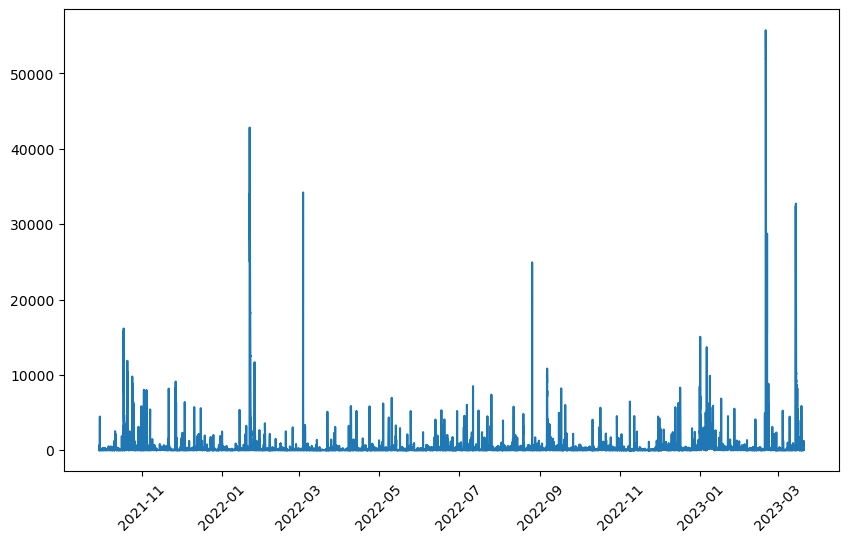

In [6]:
## Plot all columns on the same axis
plt.figure()  # Create a new figure
# Plot columns 2 through 10 on the same axis
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(cust, 
    #(county_data['CustomersOut']), 
    #100.0*(county_data['CustomersOut']/county_data['CustomersTracked']), 
    label='county')

#plt.title('California County Outages')  # Set the title
#plt.xlabel('Index')  # Set the x-axis label
#plt.ylabel('Outages: Percent')  # Set the y-axis label
plt.xticks(rotation=45)
#plt.grid(True)  # Enable grid lines
#plt.legend()  # Show the legend with column names
#plt.show()  # Show the plot
#plt.savefig('county-time.png', bbox_inches='tight', dpi=600)